**Project Title: Future Sales Prediction**


Steps for dataset loading and preprocessing

*   load the csv file
*  handling the null values,missing values and duplicate values




In [ ]:
#colab drive link:
https://colab.research.google.com/drive/1aU4iN_P-UZo8jM72PmxApwz7QJWutuCp

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from pathlib import Path
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [2]:
pip install keras

In [3]:
pip install --upgrade --user keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.14.0 which is incompatible.


In [5]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import LSTM

In [7]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
import pickle
import warnings

In [8]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
dataset = pd.read_csv('/content/Sales.csv')
df = dataset.copy()
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
sales_data = pd.read_csv('/content/Sales.csv')
df_s = sales_data.copy()
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
df_s.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [24]:
duplicates = dataset.duplicated()

# Print the duplicate rows
print(dataset[duplicates])

Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


In [25]:
# Drop duplicate rows
data = dataset.drop_duplicates()

# Print the updated DataFrame
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [26]:
dataset[10:25]

,TV,Radio,Newspaper,Sales
10,66.1,5.8,24.2,12.6
11,214.7,24.0,4.0,17.4
12,23.8,35.1,65.9,9.2
13,97.5,7.6,7.2,13.7
14,204.1,32.9,46.0,19.0
15,195.4,47.7,52.9,22.4
16,67.8,36.6,114.0,12.5
17,281.4,39.6,55.8,24.4
18,69.2,20.5,18.3,11.3
19,147.3,23.9,19.1,14.6


In [27]:
#checking for missing values
df.isna().head()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [28]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [29]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""

    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []

    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing,
        'pc_missing': pc_missing
    })

    return output

In [30]:
show_missing(df)

,variable,dtype,count,unique,missing,pc_missing
0,TV,float64,200,190,0,0.0
1,Radio,float64,200,167,0,0.0
2,Newspaper,float64,200,172,0,0.0
3,Sales,float64,200,121,0,0.0


In [15]:
df_s['Sales'].describe()

count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

<Axes: >

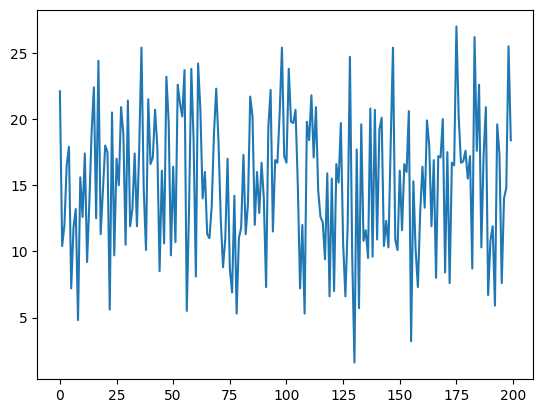

In [16]:
df_s['Sales'].plot()

In [17]:
df_s['TV'].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

<Axes: >

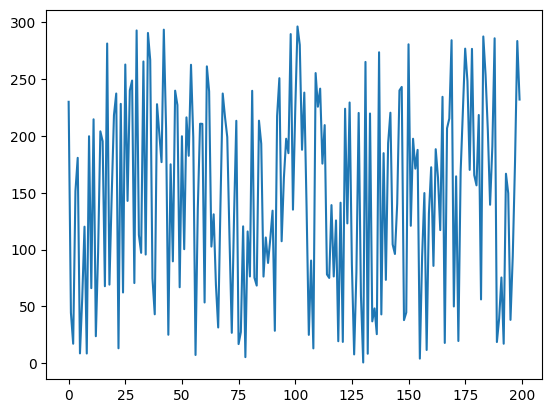

In [18]:
df_s['TV'].plot()

In [19]:
df_s['Radio'].describe()

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: Radio, dtype: float64

<Axes: >

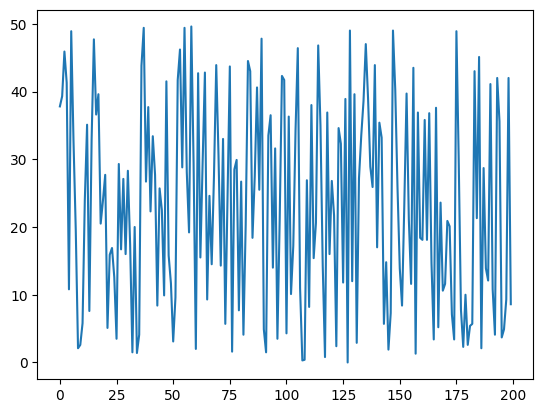

In [20]:
df_s['Radio'].plot()

In [21]:
df_s['Newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

<Axes: >

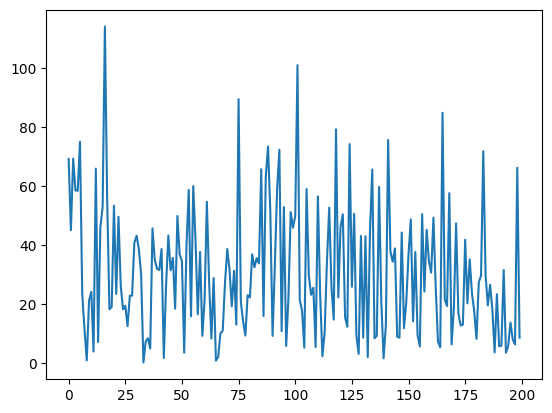

In [31]:
df_s['Newspaper'].plot()